In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open("Benchmark.txt", "r") as file:
    content = file.read()
#print(content)
data = re.findall("(.*)MV  np: (.*)  nx: (.*)  Time .*MV: (.*) Time MPI: (.*) Acceleration: (.*)", content)
df = pd.DataFrame(data, columns=["Type", "np", "nx", "Standard Time", "MPI Time", "Acceleration"])

In [3]:
df.replace({"inf" : 0}, inplace = True)
df.iloc[:, 1:] = df.iloc[:, 1:].astype(float)
df_sp = df.loc[df["Type"]=="SP"].copy()
df_dense = df.loc[df["Type"]=="Dense"].copy()
sp_mean = df_sp.groupby("nx").agg({"Standard Time": "sum"})/7
df_sp["Acceleration2"] = df_sp["nx"]
df_sp.loc[:, "Acceleration2"] = df_sp.loc[:, "Acceleration2"].replace(sp_mean.to_dict()['Standard Time']) / df_sp["MPI Time"]
dense_mean = df_dense.groupby("nx").agg({"Standard Time": "sum"})/7
df_dense["Acceleration2"] = df_dense["nx"]
df_dense.loc[:, "Acceleration2"] = df_dense.loc[:, "Acceleration2"].replace(dense_mean.to_dict()['Standard Time']) / df_dense["MPI Time"]
df_dense.replace({"inf" : 0}, inplace = True)

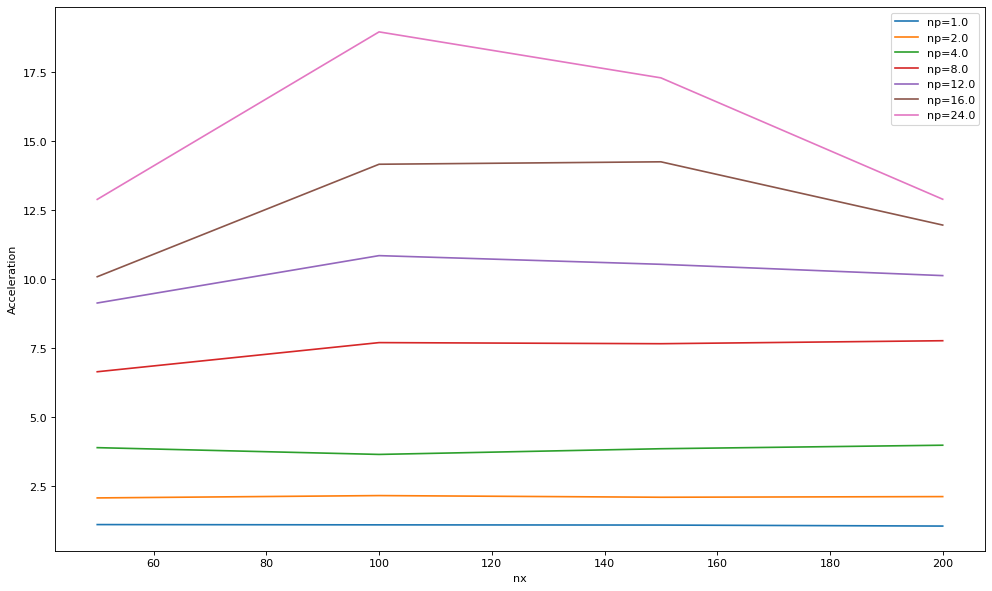

In [4]:
plt.figure(figsize=(15, 9), dpi=80)
for np in df_sp["np"].unique():
    plt.plot(df_sp.loc[df_sp["np"]==np, "nx"], df_sp.loc[df_sp["np"]==np, "Acceleration2"], label=f"np={np}")
plt.xlabel("nx")
plt.ylabel("Acceleration")
plt.legend()

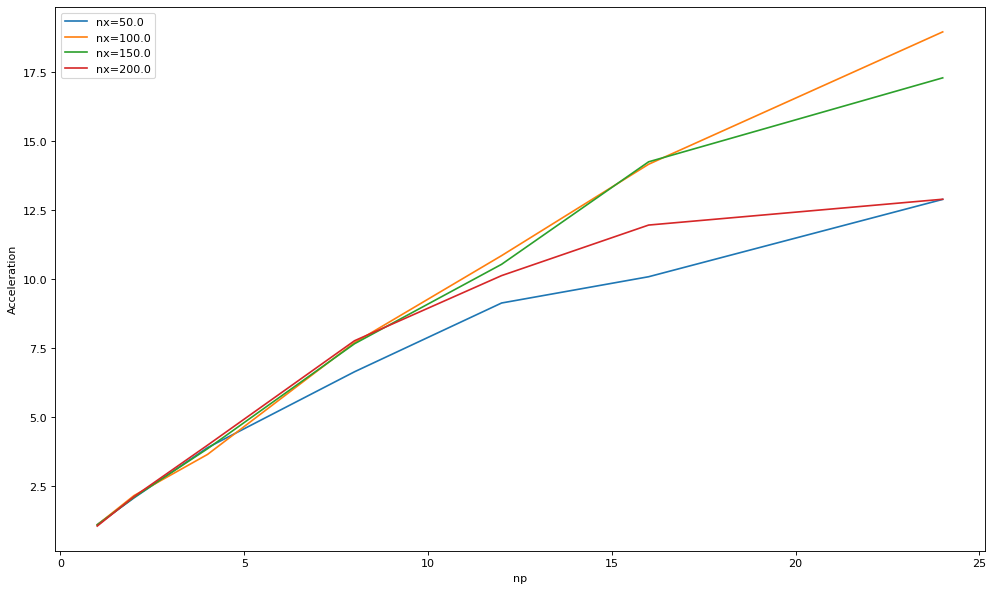

In [5]:
plt.figure(figsize=(15, 9), dpi=80)
for nx in df_sp["nx"].unique():
    plt.plot(df_sp.loc[df_sp["nx"]==nx, "np"], df_sp.loc[df_sp["nx"]==nx, "Acceleration2"], label=f"nx={nx}")
plt.xlabel("np")
plt.ylabel("Acceleration")
plt.legend()

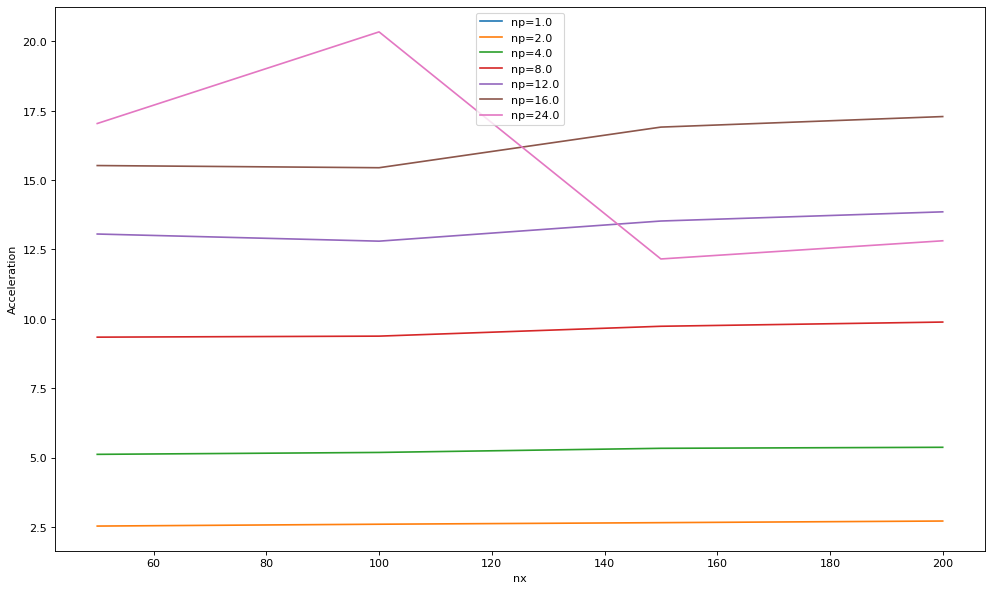

In [6]:
plt.figure(figsize=(15, 9), dpi=80)
for np in df_dense["np"].unique():
    plt.plot(df_dense.loc[df_dense["np"]==np, "nx"], df_dense.loc[df_dense["np"]==np, "Acceleration2"], label=f"np={np}")
plt.xlabel("nx")
plt.ylabel("Acceleration")
plt.legend()

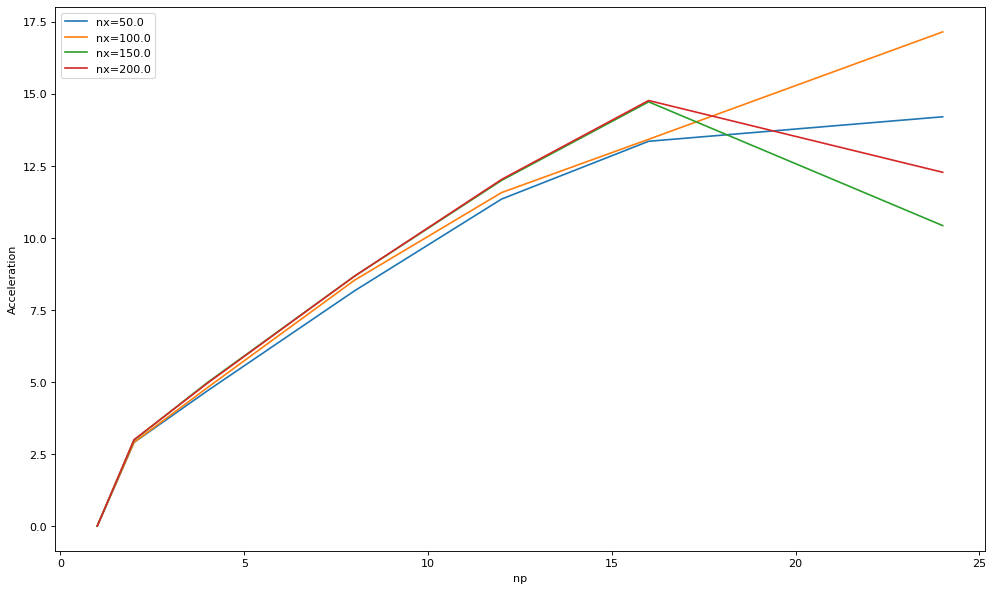

In [7]:
plt.figure(figsize=(15, 9), dpi=80)
for nx in df_dense["nx"].unique():
    plt.plot(df_dense.loc[df_dense["nx"]==nx, "np"], df_dense.loc[df_dense["nx"]==nx, "Acceleration"], label=f"nx={nx}")
plt.xlabel("np")
plt.ylabel("Acceleration")
plt.legend()

Text(0, 0.5, 'MPI Time')

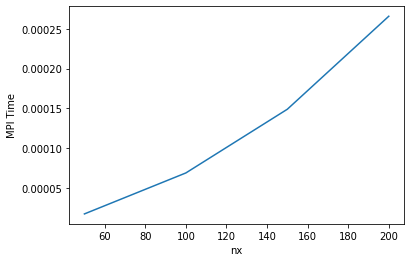

In [8]:
plt.plot(df_sp["nx"].unique(), df_sp.groupby("nx").agg({"Standard Time": "sum"})/7)
plt.xlabel("nx")
plt.ylabel("MPI Time")

# Life of Boids

Text(0, 0.5, 'Acceleration')

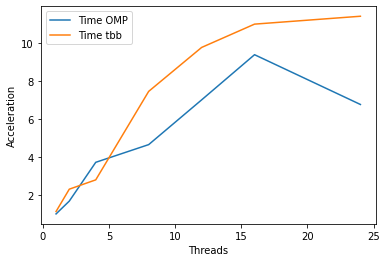

In [9]:
import numpy as np
with open("Benchmark_LOB.txt", "r") as file:
    content = file.read()
#print(content)
data = np.array(re.findall("nb_threads: (.*) OMP Time: (.*) Tbb Time: (.*)", content))
strd_time = re.findall("Standard Time: (.*)", content)
strd_time = np.array([float(time) for time in strd_time]).mean()
data = data.astype(float)
df = pd.DataFrame(data, columns=["Threads", "Time OMP", "Time tbb"])
df = df.groupby("Threads").agg({"Time OMP": "sum", "Time tbb": "sum"})/4
df = strd_time / df
df.reset_index(inplace=True)
ax = df.plot(0, [1, 2])
ax.set_ylabel("Acceleration")